# Reading the results

WARNING *** file size (2252492) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

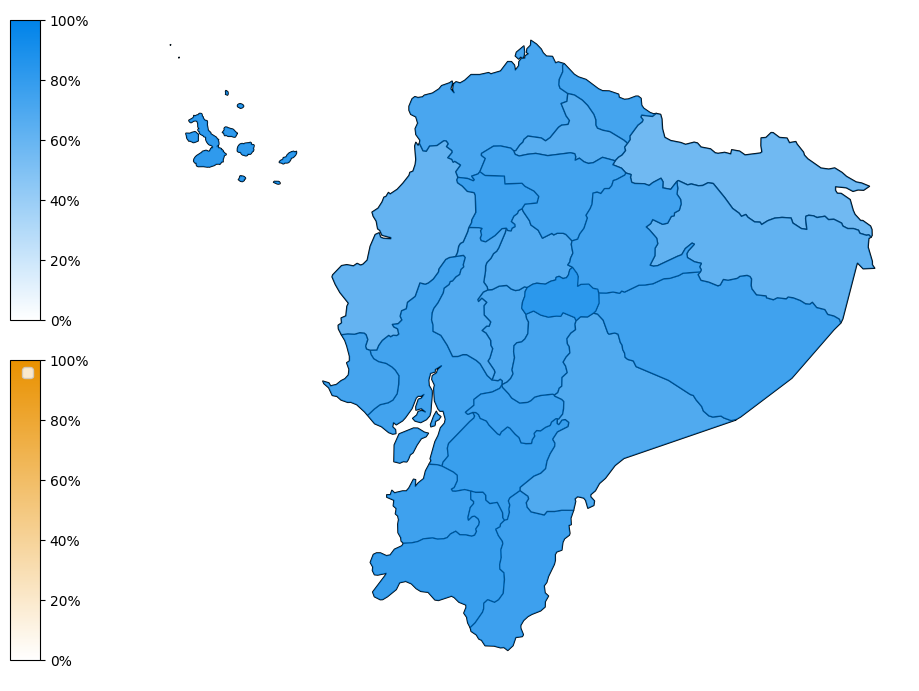

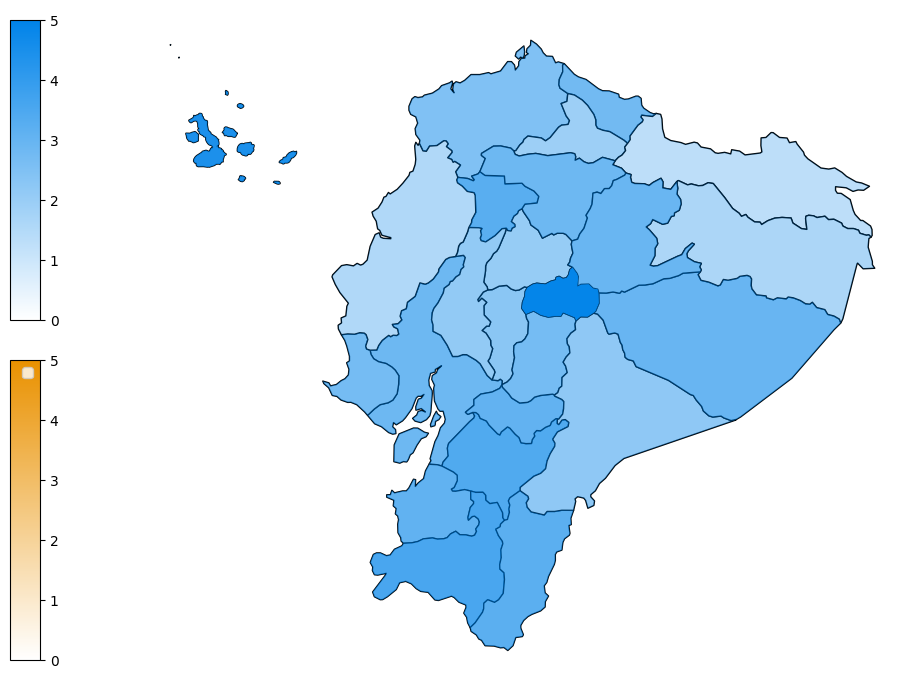

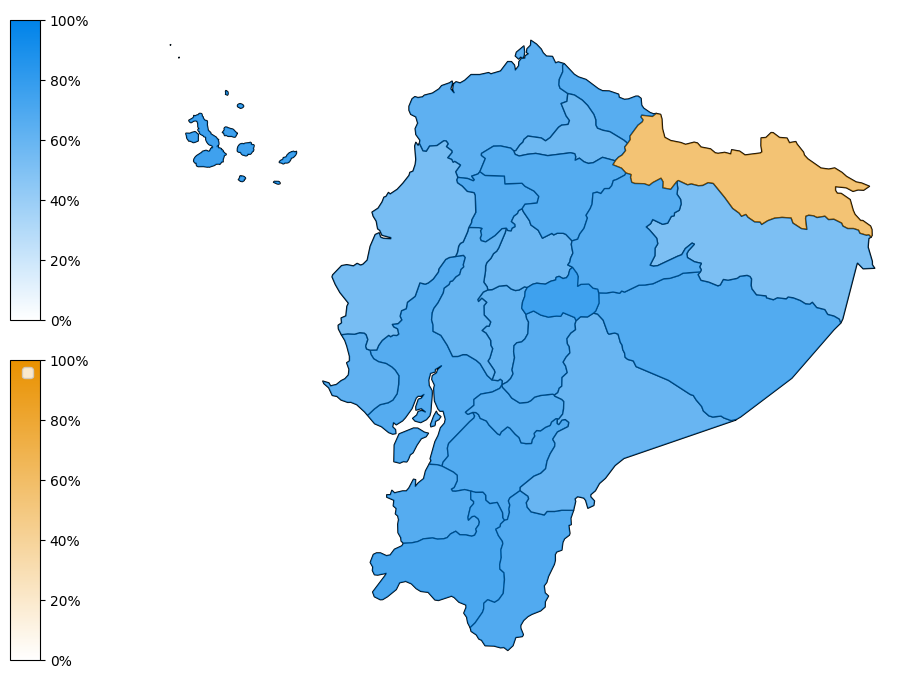

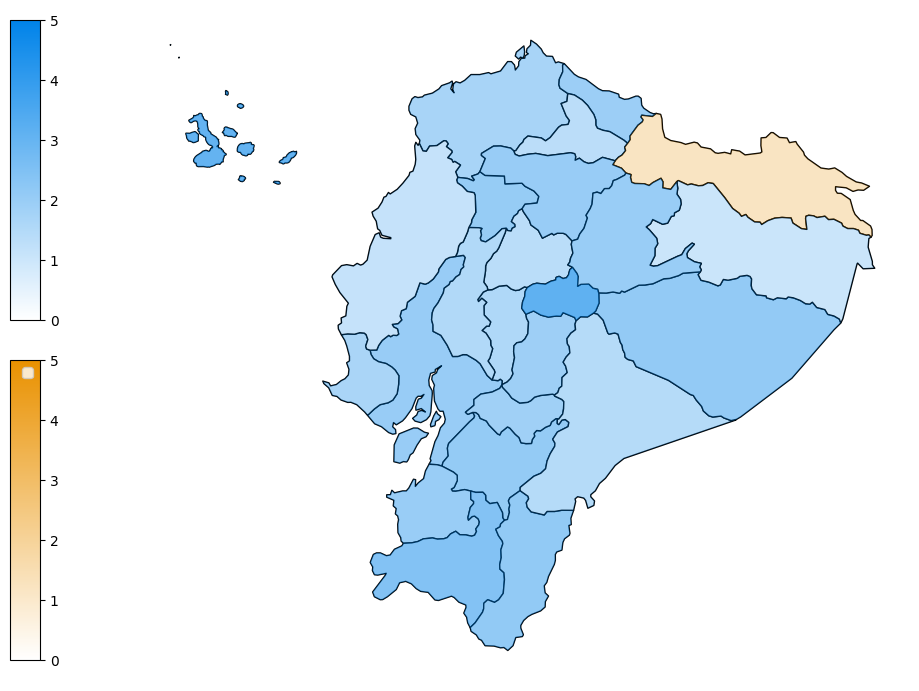

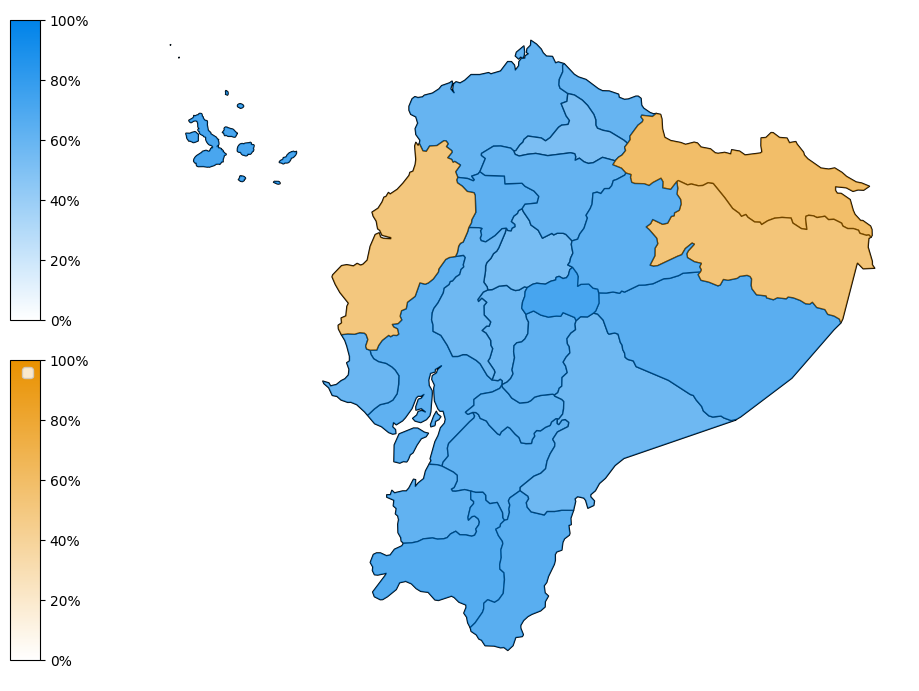

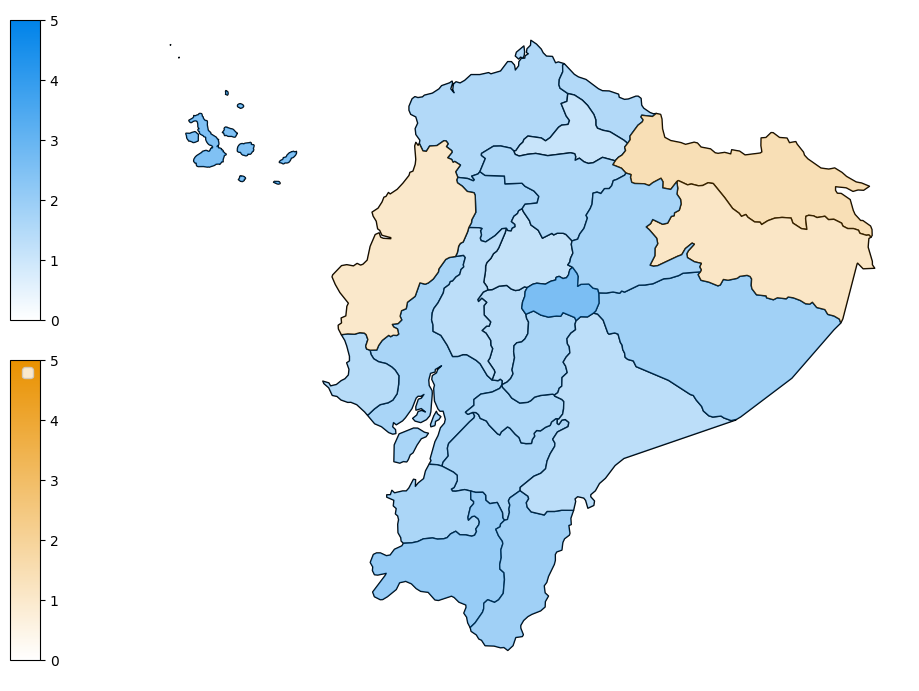

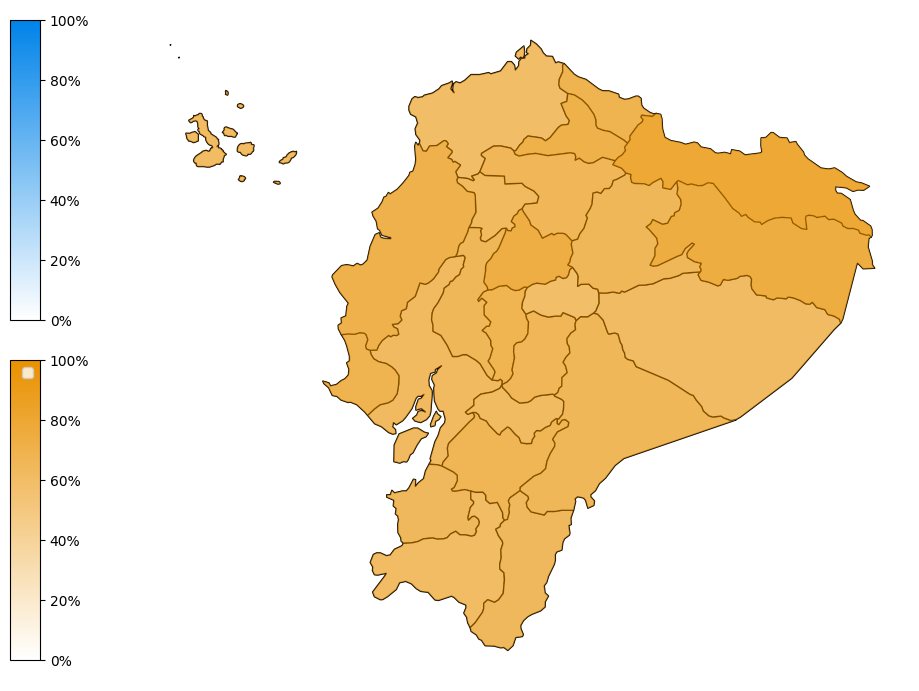

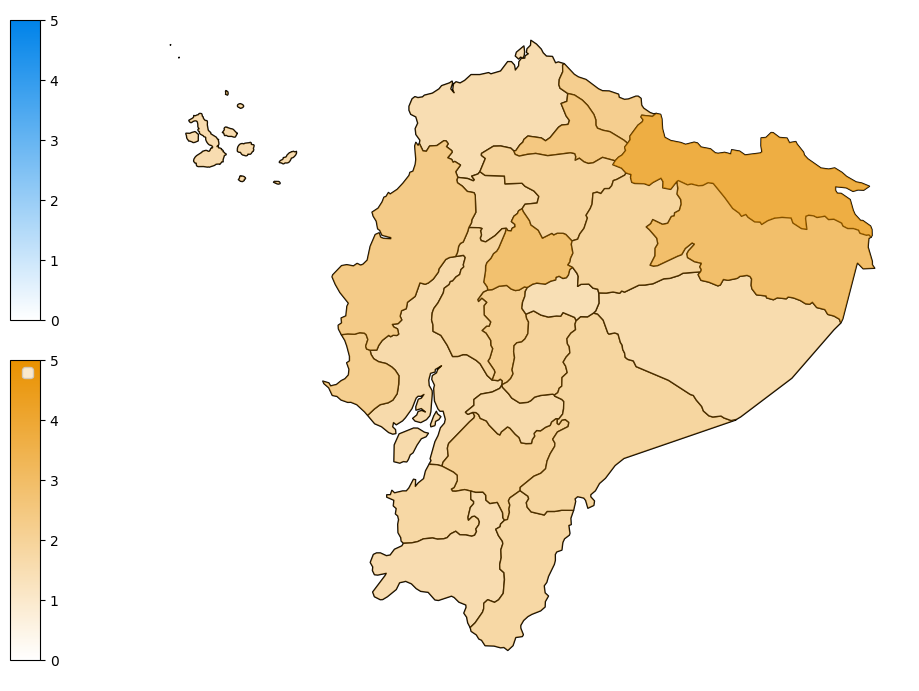

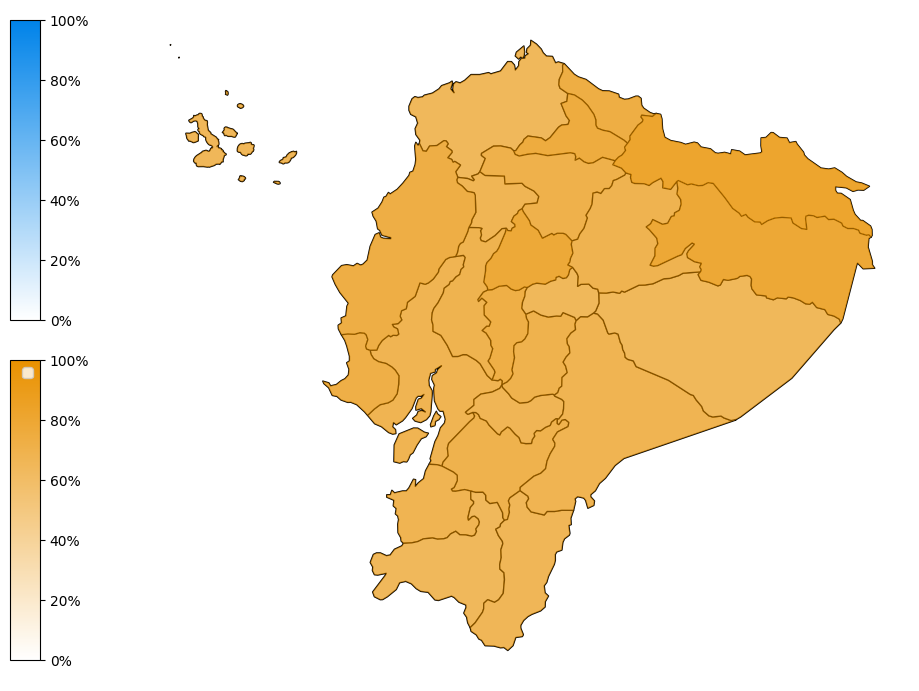

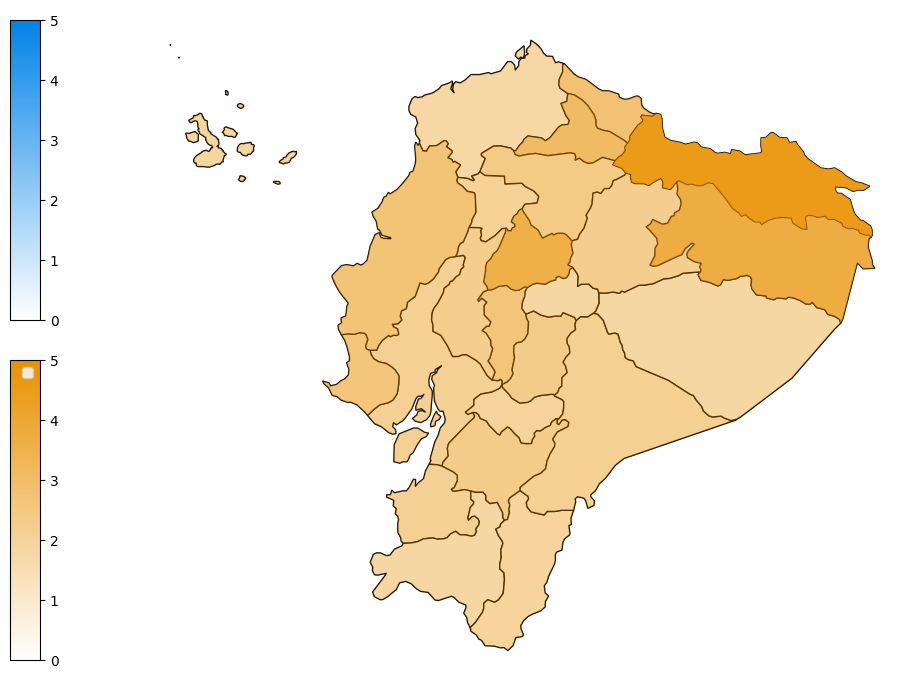

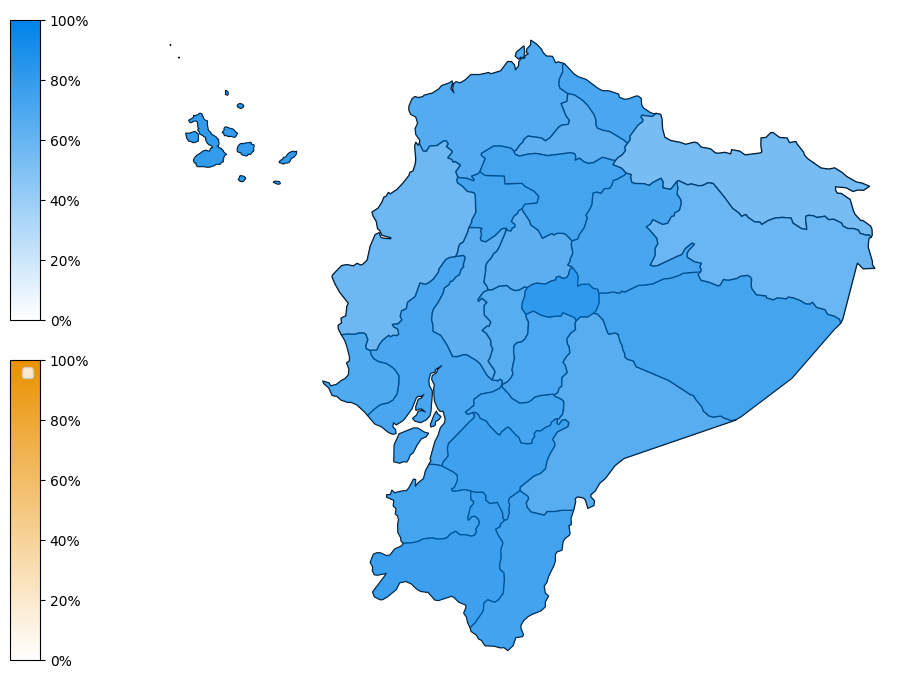

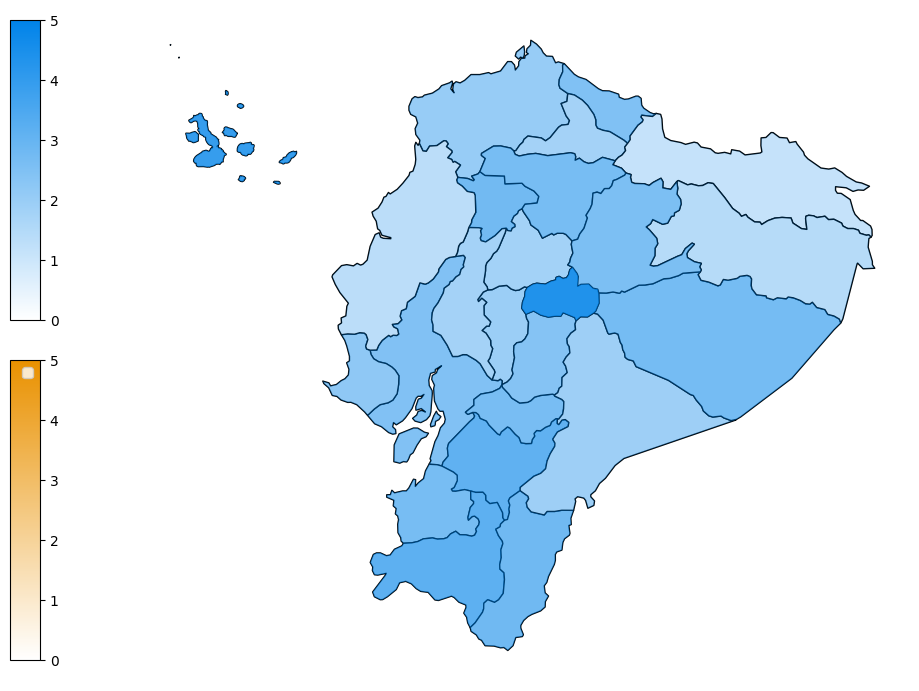

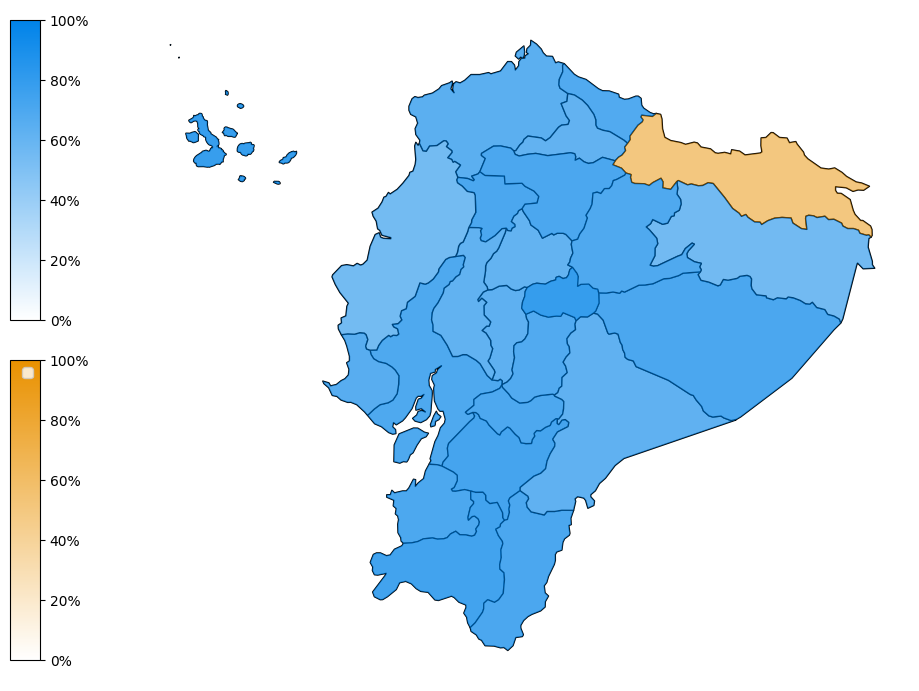

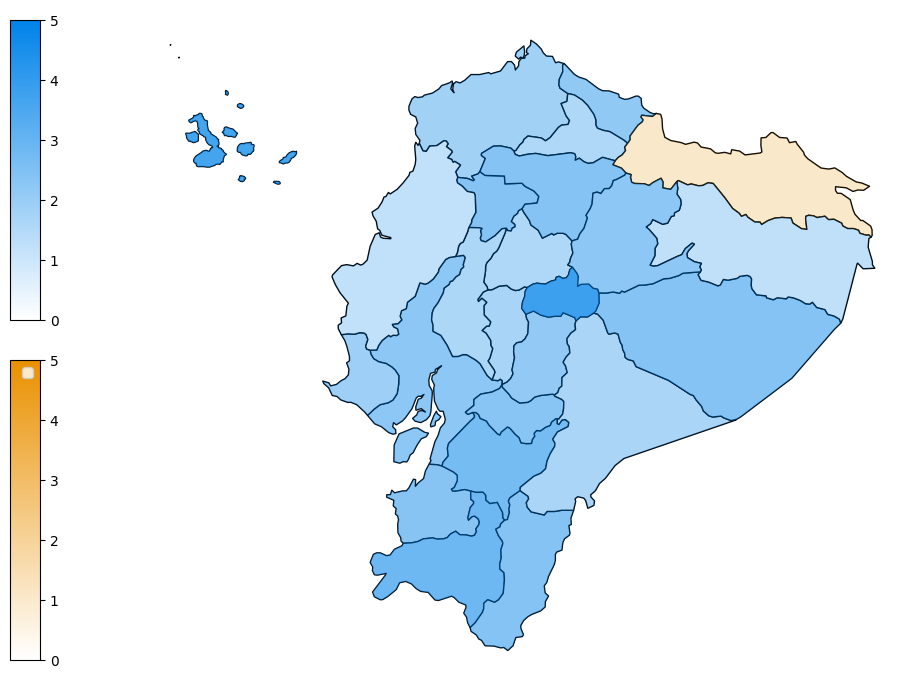

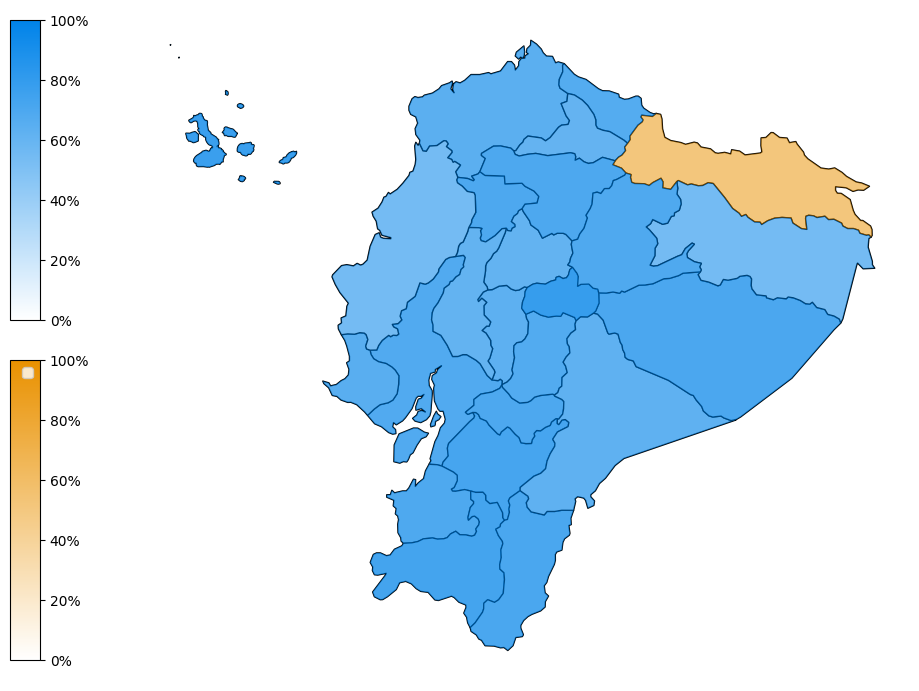

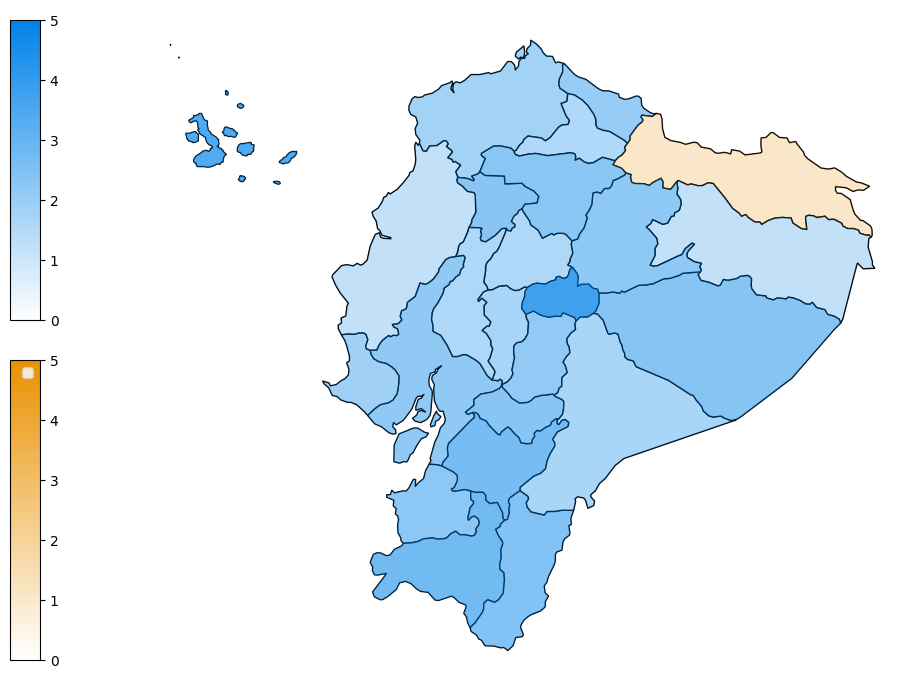

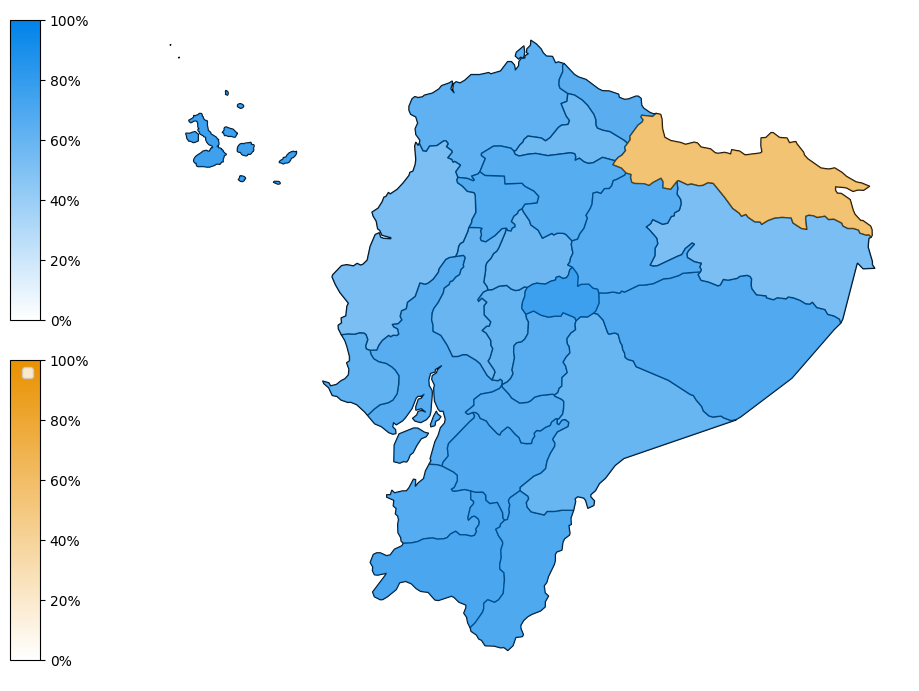

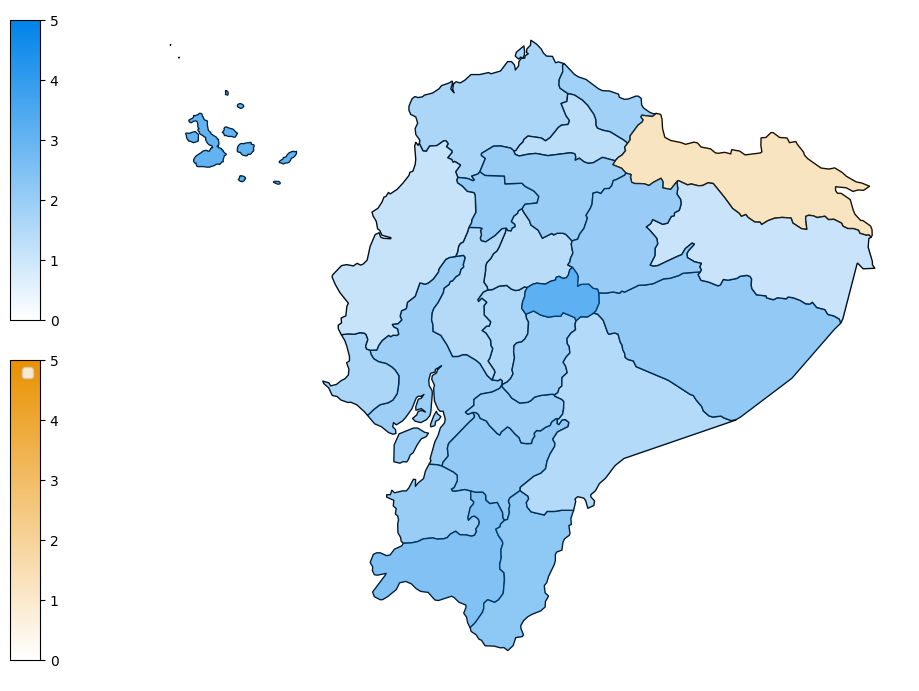

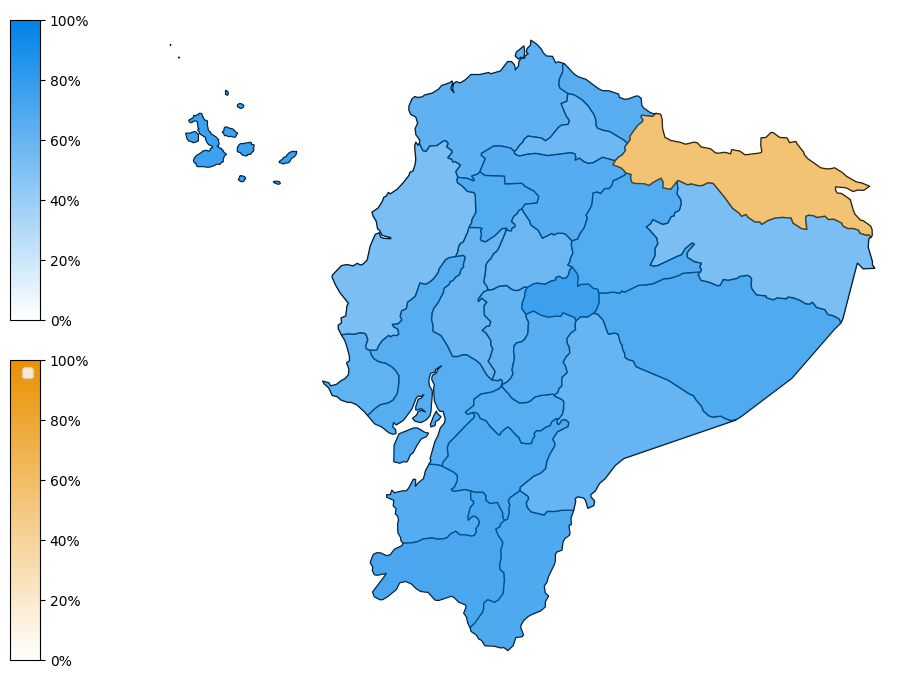

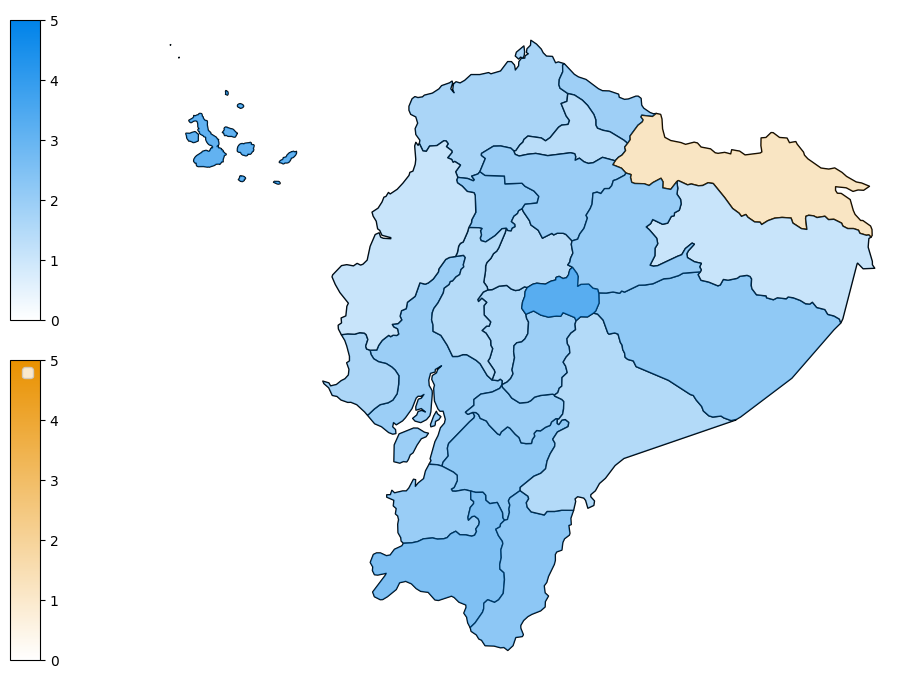

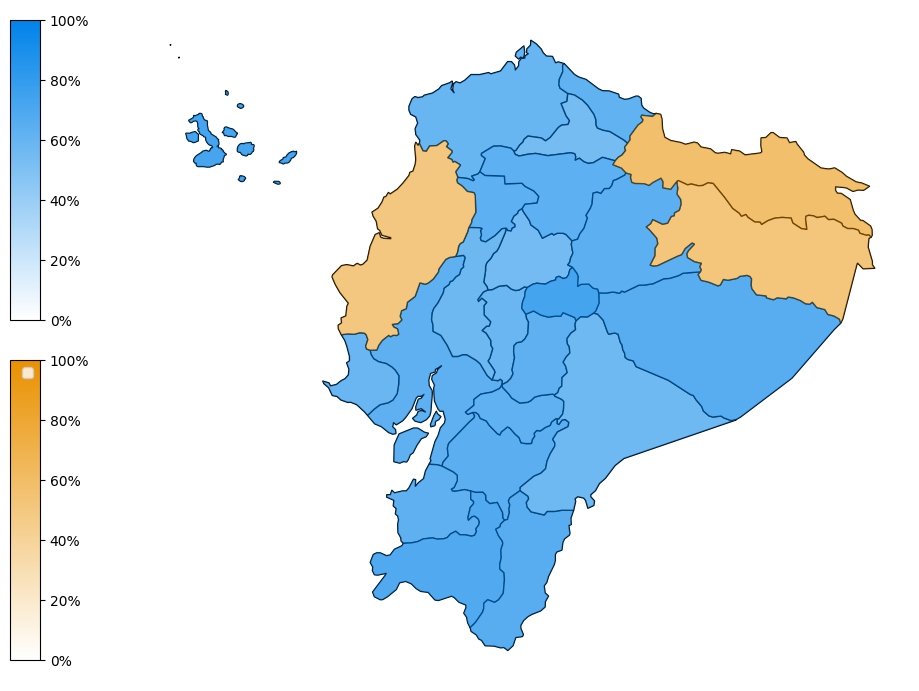

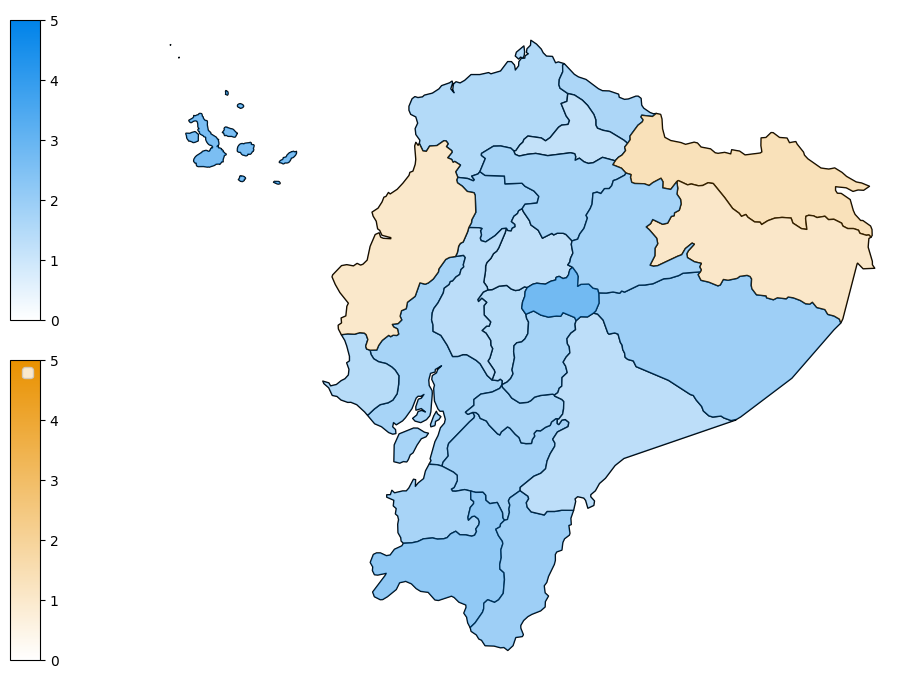

In [10]:
import pandas as pd

PREGUNTAS = pd.read_excel('../resultados_azure/CATALOGO/PREGUNTAS.xls')
CANTON = pd.read_excel('../resultados_azure/CATALOGO/CANTON.xls')
CIRCUNSCRIPCION = pd.read_excel('../resultados_azure/CATALOGO/CIRCUNSCRIPCION.xls')
DIGNIDAD = pd.read_excel('../resultados_azure/CATALOGO/DIGNIDAD.xls')
JUNTA = pd.read_excel('../resultados_azure/CATALOGO/JUNTA.xls')
PARROQUIA = pd.read_excel('../resultados_azure/CATALOGO/PARROQUIA.xls')
OPCIONES = pd.read_excel('../resultados_azure/CATALOGO/OPCIONES.xls')
PROVINCIA = pd.read_excel('../resultados_azure/CATALOGO/PROVINCIA.xls')
ZONA = pd.read_excel('../resultados_azure/CATALOGO/ZONA.xls')

bases_azure = [
    "../resultados_azure/A_REFERENDUM_PREGUNTA_2024.04.25_01.50.01.txt",
    "../resultados_azure/B_REFERENDUM_PREGUNTA1_2024.04.25_01.50.02.txt",
    "../resultados_azure/C_REFERENDUM_PREGUNTA2_2024.04.25_01.50.03.txt",
    "../resultados_azure/D_REFERENDUM_PREGUNTA3_2024.04.25_01.50.04.txt",
    "../resultados_azure/E_REFERENDUM_PREGUNTA4_2024.04.25_01.50.05.txt",
    "../resultados_azure/F_CONSULTAPOPULAR_PREGUNTA1_2024.04.25_01.55.06.txt",
    "../resultados_azure/G_CONSULTAPOPULAR_PREGUNTA2_2024.04.25_01.55.08.txt",
    "../resultados_azure/H_CONSULTAPOPULAR_PREGUNTA3_2024.04.25_01.55.09.txt",
    "../resultados_azure/I_CONSULTAPOPULAR_PREGUNTA4_2024.04.25_01.55.09.txt",
    "../resultados_azure/J_CONSULTAPOPULAR_PREGUNTA5_2024.04.25_01.55.10.txt",
    "../resultados_azure/K_CONSULTAPOPULAR_PREGUNTA6_2024.04.25_01.55.11.txt"
]

final = pd.DataFrame()
for i in bases_azure:
    lectura =  pd.read_table(i,sep='|',names= 
                             ['COD_DIGNIDAD','COD_PROVINCIA',
                              'COD_CIRCUNSCRIPCION','COD_CANTON','COD_PARROQUIA',
                              'COD_ZONA','NUM_JUNTA','SEX_JUNTA','COD_JUNTA',
                              'COD_PREGUNTA','COD_OPCION','NUM_SUF_ACTA','BLANCOS','NULOS','FIN_RESULTADO'])
    final = pd.concat([final,lectura])

exterior = ['EUROPA ASIA Y OCEANIA', 'EE.UU CANADA', 'AMERICA LATINA EL CARIBE Y AFRICA']
baseP = final

baseP = pd.merge(DIGNIDAD,baseP,on='COD_DIGNIDAD')
baseP = pd.merge(PROVINCIA,baseP,on='COD_PROVINCIA')
baseP = pd.merge(CANTON[['COD_CANTON','NOM_CANTON']],baseP,on='COD_CANTON')
baseP = pd.merge(PARROQUIA[['COD_PARROQUIA','NOM_PARROQUIA']],baseP,on='COD_PARROQUIA')
#baseP = pd.merge(Est_parroquia,baseP,on='COD_PARROQUIA')
baseP = pd.merge(PREGUNTAS[['COD_PREGUNTA','NOM_PREGUNTA','LIS_PREGUNTA']],baseP,on='COD_PREGUNTA')
baseP = pd.merge(OPCIONES[['COD_OPCION','NOM_OPCION']],baseP,on='COD_OPCION')

baseP = baseP[-baseP['NOM_PROVINCIA'].isin(exterior)]

resultadosP = baseP.groupby(by = ['NOM_PREGUNTA','NOM_PROVINCIA','NOM_OPCION']).sum(numeric_only=True)[['FIN_RESULTADO']].reset_index()
resultadosP = resultadosP[-resultadosP['NOM_PROVINCIA'].isin(exterior)]


preguntas = resultadosP['NOM_PREGUNTA'].unique()
provincias = resultadosP['NOM_PROVINCIA'].unique()


def proporcion(NO,SI):
    if NO>=SI:
        return NO/SI, 'NO'
    return SI/NO, 'SI'
baseP.groupby(by = ['NOM_PREGUNTA','NOM_PROVINCIA','NOM_OPCION']).sum(numeric_only=True)[['FIN_RESULTADO']].reset_index()
resultado_prop = pd.pivot_table(baseP,'FIN_RESULTADO',aggfunc='sum',index=['NOM_PREGUNTA','NOM_PROVINCIA'],columns='NOM_OPCION').reset_index()
resultado_prop['prop'] = resultado_prop.apply(lambda row: proporcion(row['NO'],row['SI']),axis=1)
resultado_prop = pd.concat([resultado_prop,resultado_prop['prop'].apply(lambda x: pd.Series(str(x).strip("()'").split(", '")))],axis=1)
resultado_prop['Normalizacion'] = resultado_prop[0].astype(float)/5
resultado_prop['TOTAL'] = resultado_prop['NO'] + resultado_prop['SI']
resultado_prop['NO_prop'] = resultado_prop['NO']/resultado_prop['TOTAL']
resultado_prop['SI_prop'] = resultado_prop['SI']/resultado_prop['TOTAL']
resultado_prop['NO %'] = resultado_prop['NO_prop'].apply(lambda x: f"{x:.2%}")
resultado_prop['SI %'] = resultado_prop['SI_prop'].apply(lambda x: f"{x:.2%}")
resultado_prop[0] = resultado_prop[0].astype(float).apply(lambda x: round(x,2))

for pregunta in preguntas:
    df1 = resultado_prop[resultado_prop['NOM_PREGUNTA']==pregunta][['NOM_PROVINCIA','SI %','NO %']]
    df2 = resultado_prop[resultado_prop['NOM_PREGUNTA']==pregunta][['NOM_PROVINCIA',0]]
    df2[0] = df2[0].astype(float).apply(lambda x: round(x,2))
    
    prop_SI = resultado_prop[(resultado_prop['NOM_PREGUNTA']==pregunta) & (resultado_prop[1]=='SI')][['NOM_PROVINCIA','SI_prop']].set_index('NOM_PROVINCIA').to_dict()['SI_prop']
    prop_NO = resultado_prop[(resultado_prop['NOM_PREGUNTA']==pregunta) & (resultado_prop[1]=='NO')][['NOM_PROVINCIA','NO_prop']].set_index('NOM_PROVINCIA').to_dict()['NO_prop']
    
    dic_SI = resultado_prop[(resultado_prop['NOM_PREGUNTA']==pregunta) & (resultado_prop[1]=='SI')][['NOM_PROVINCIA','Normalizacion',0]]
    dic_SI_norm = dic_SI.copy() 
    if dic_SI.shape[0] == 0:
        dic_SI = {}
        dic_SI_norm = {}
    else:
        dic_SI[0] = dic_SI[0].astype(float)
        dic_SI = dic_SI.set_index('NOM_PROVINCIA').to_dict()[0]    
        dic_SI_norm['Normalizacion'] = dic_SI_norm['Normalizacion'].astype(float)
        dic_SI_norm = dic_SI_norm.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
        
    dic_NO = resultado_prop[(resultado_prop['NOM_PREGUNTA']==pregunta) & (resultado_prop[1]=='NO')][['NOM_PROVINCIA','Normalizacion',0]]
    dic_NO_norm = dic_NO.copy() 
    if dic_NO.shape[0] == 0:
        dic_NO = {}
        dic_NO_norm = {}
    else:
        dic_NO[0] = dic_NO[0].astype(float)
        dic_NO = dic_NO.set_index('NOM_PROVINCIA').to_dict()[0]     
        dic_NO_norm['Normalizacion'] = dic_NO_norm['Normalizacion'].astype(float)
        dic_NO_norm = dic_NO_norm.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
    
    # GRAFICO 1
    import geopandas as gpd
    import matplotlib.pyplot as plt
    from matplotlib.colors import Normalize, LinearSegmentedColormap
    from matplotlib.colorbar import ColorbarBase
    import matplotlib.ticker as ticker

    # Load GeoJSON file
    gdf = gpd.read_file("Ecuador.geojson")
    gdf['name'] = gdf['name'].str.upper()
    gdf['name'] = gdf['name'].str.replace('SANTO DOMINGO DE LOS TSACHILAS', 'STO DGO TSACHILAS')

    color_si = '#0083E9'
    color_no = '#E99100'

    # Plot the shapes with a heatmap-like effect based on the score
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color='white', edgecolor='black')

    for name, score in prop_SI.items():
        shape = gdf[gdf['name'] == name]
        shape.plot(ax=ax, color=color_si, alpha=score, linewidth=0, label=name)
        
    for name, score in prop_NO.items():
        shape = gdf[gdf['name'] == name]
        shape.plot(ax=ax, color=color_no, alpha=score, linewidth=0, label=name)

    # Create a colormap with a gradient using the specified color
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_si)])

    # Crea un objeto Normalizar para mapear los valores al rango 0-1
    norm = Normalize(vmin=0, vmax=1)

    valores_a_convertir_si = prop_SI.values()
    valores_a_convertir_no = prop_NO.values()

    # Obtiene los colores correspondientes a los valores dados
    colores_correspondientes_si = [cmap(norm(valor)) for valor in valores_a_convertir_si]



    # Convierte los colores de formato RGB a formato hexadecimal
    colores_hex_si = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_si]


    # Add colorbar
    cbar_ax1 = fig.add_axes([0, 0.52, 0.03, 0.3])
    norm = Normalize(vmin=0, vmax=1)
    cbar = ColorbarBase(ax=cbar_ax1, cmap=cmap, norm=norm)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

    # Create a colormap with a gradient using the specified color
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_no)])
    colores_correspondientes_no = [cmap(norm(valor)) for valor in valores_a_convertir_no]
    colores_hex_no = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_no]
    # Add colorbar
    cbar_ax2 = fig.add_axes([0, 0.18, 0.03, 0.3])
    norm = Normalize(vmin=0, vmax=1)
    cbar = ColorbarBase(ax=cbar_ax2, cmap=cmap, norm=norm)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

    plt.legend()
    ax.axis('off')
    # Save the plot as a PNG image
    plt.savefig(f'mapas/{pregunta}_1.png', dpi=300, transparent=True)  # Adjust dpi as needed

    data_SI = {
        'NOM_PROVINCIA' : prop_SI.keys(),
        'PROP' : prop_SI.values()
    }
    data_SI = pd.DataFrame(data_SI)
    data_SI['Color Hex'] = colores_hex_si
    data_SI['RESPUESTA'] = 'SI'

    data_NO = {
        'NOM_PROVINCIA' : prop_NO.keys(),
        'PROP' : prop_NO.values()
    }
    data_NO = pd.DataFrame(data_NO)
    data_NO['Color Hex'] = colores_hex_no
    data_NO['RESPUESTA'] = 'NO'

    data_1 = pd.concat([data_SI,data_NO])
    data_1


    #PLOT 2
    import geopandas as gpd
    import matplotlib.pyplot as plt
    from matplotlib.colors import Normalize, LinearSegmentedColormap
    from matplotlib.colorbar import ColorbarBase
    import matplotlib.ticker as ticker

    # Load GeoJSON file
    gdf = gpd.read_file("Ecuador.geojson")
    gdf['name'] = gdf['name'].str.upper()
    gdf['name'] = gdf['name'].str.replace('SANTO DOMINGO DE LOS TSACHILAS', 'STO DGO TSACHILAS')

    color_si = '#0083E9'
    color_no = '#E99100'

    # Plot the shapes with a heatmap-like effect based on the score
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color='white', edgecolor='black')

    for name, score in dic_SI_norm.items():
        shape = gdf[gdf['name'] == name]
        shape.plot(ax=ax, color=color_si, alpha=score, linewidth=0, label=name)
        
    for name, score in dic_NO_norm.items():
        shape = gdf[gdf['name'] == name]
        shape.plot(ax=ax, color=color_no, alpha=score, linewidth=0, label=name)

    # Create a colormap with a gradient using the specified color
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_si)])

    # Crea un objeto Normalizar para mapear los valores al rango 0-1
    norm = Normalize(vmin=0, vmax=5)

    valores_a_convertir_si = dic_SI.values()
    valores_a_convertir_no = dic_NO.values()

    # Obtiene los colores correspondientes a los valores dados
    colores_correspondientes_si = [cmap(norm(valor)) for valor in valores_a_convertir_si]



    # Convierte los colores de formato RGB a formato hexadecimal
    colores_hex_si = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_si]


    # Add colorbar
    cbar_ax1 = fig.add_axes([0, 0.52, 0.03, 0.3])

    cbar = ColorbarBase(ax=cbar_ax1, cmap=cmap, norm=norm)
    #cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

    # Create a colormap with a gradient using the specified color
    cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_no)])
    colores_correspondientes_no = [cmap(norm(valor)) for valor in valores_a_convertir_no]
    colores_hex_no = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_no]
    # Add colorbar
    cbar_ax2 = fig.add_axes([0, 0.18, 0.03, 0.3])

    cbar = ColorbarBase(ax=cbar_ax2, cmap=cmap, norm=norm)
    #cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

    plt.legend()
    ax.axis('off')
    # Save the plot as a PNG image
    plt.savefig(f'mapas/{pregunta}_2.png', dpi=300, transparent=True)  # Adjust dpi as needed

    data_SI = {
        'NOM_PROVINCIA' : dic_SI.keys(),
        'PROP' : dic_SI.values()
    }
    data_SI = pd.DataFrame(data_SI)
    data_SI['Color Hex'] = colores_hex_si
    data_SI['RESPUESTA'] = 'SI'

    data_NO = {
        'NOM_PROVINCIA' : dic_NO.keys(),
        'PROP' : dic_NO.values()
    }
    data_NO = pd.DataFrame(data_NO)
    data_NO['Color Hex'] = colores_hex_no
    data_NO['RESPUESTA'] = 'NO'

    data_2 = pd.concat([data_SI,data_NO])
    data_2


In [5]:
data_1

,NOM_PROVINCIA,PROP,Color Hex,RESPUESTA
0,AZUAY,0.680769,#51aaf0,SI
1,BOLIVAR,0.613360,#62b3f1,SI
2,CARCHI,0.648024,#5aaff1,SI
3,CAÑAR,0.658776,#57adf1,SI
4,CHIMBORAZO,0.656564,#57adf1,SI
5,COTOPAXI,0.577559,#6cb8f2,SI
6,EL ORO,0.665270,#55acf0,SI
7,ESMERALDAS,0.622848,#60b2f1,SI
8,GALAPAGOS,0.752050,#3fa2ee,SI
9,GUAYAS,0.660749,#56adf0,SI


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,NOM_PROVINCIA,PROP,Color Hex,RESPUESTA
0,AZUAY,0.680769,#51aaf0,SI
1,BOLIVAR,0.613360,#62b3f1,SI
2,CARCHI,0.648024,#5aaff1,SI
3,CAÑAR,0.658776,#57adf1,SI
4,CHIMBORAZO,0.656564,#57adf1,SI
5,COTOPAXI,0.577559,#6cb8f2,SI
6,EL ORO,0.665270,#55acf0,SI
7,ESMERALDAS,0.622848,#60b2f1,SI
8,GALAPAGOS,0.752050,#3fa2ee,SI
9,GUAYAS,0.660749,#56adf0,SI


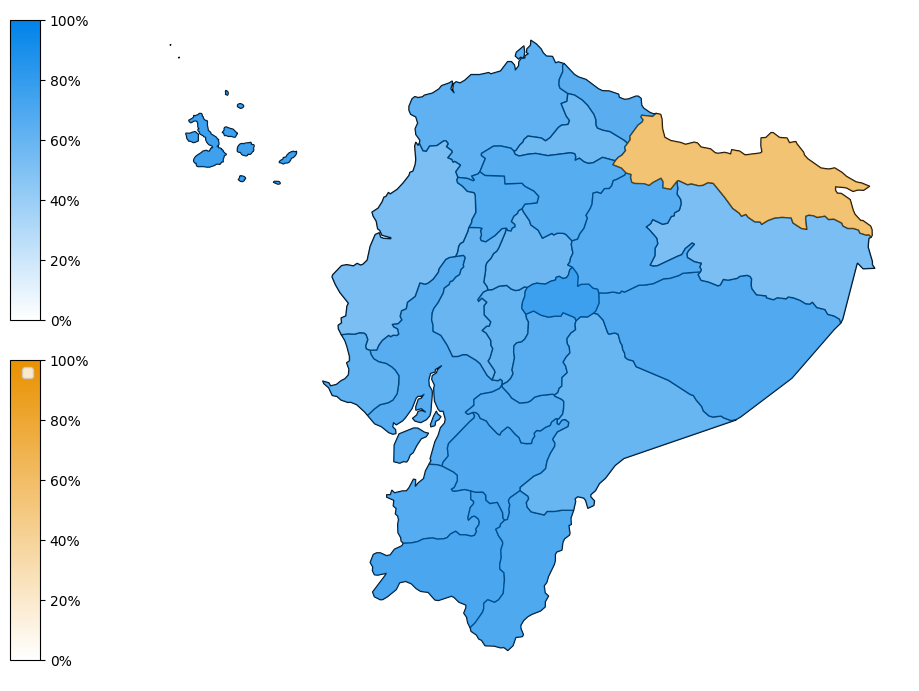

In [234]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib.ticker as ticker

# Load GeoJSON file
gdf = gpd.read_file("Ecuador.geojson")
gdf['name'] = gdf['name'].str.upper()
gdf['name'] = gdf['name'].str.replace('SANTO DOMINGO DE LOS TSACHILAS', 'STO DGO TSACHILAS')

color_si = '#0083E9'
color_no = '#E99100'

# Plot the shapes with a heatmap-like effect based on the score
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')

for name, score in prop_SI.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color=color_si, alpha=score, linewidth=0, label=name)
    
for name, score in prop_NO.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color=color_no, alpha=score, linewidth=0, label=name)

# Create a colormap with a gradient using the specified color
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_si)])

# Crea un objeto Normalizar para mapear los valores al rango 0-1
norm = Normalize(vmin=0, vmax=1)

valores_a_convertir_si = prop_SI.values()
valores_a_convertir_no = prop_NO.values()

# Obtiene los colores correspondientes a los valores dados
colores_correspondientes_si = [cmap(norm(valor)) for valor in valores_a_convertir_si]



# Convierte los colores de formato RGB a formato hexadecimal
colores_hex_si = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_si]


# Add colorbar
cbar_ax1 = fig.add_axes([0, 0.52, 0.03, 0.3])
norm = Normalize(vmin=0, vmax=1)
cbar = ColorbarBase(ax=cbar_ax1, cmap=cmap, norm=norm)
cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

# Create a colormap with a gradient using the specified color
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_no)])
colores_correspondientes_no = [cmap(norm(valor)) for valor in valores_a_convertir_no]
colores_hex_no = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_no]
# Add colorbar
cbar_ax2 = fig.add_axes([0, 0.18, 0.03, 0.3])
norm = Normalize(vmin=0, vmax=1)
cbar = ColorbarBase(ax=cbar_ax2, cmap=cmap, norm=norm)
cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

plt.legend()
ax.axis('off')
# Save the plot as a PNG image
plt.savefig('mapas/heatmap_plot.png', dpi=300, transparent=True)  # Adjust dpi as needed

data_SI = {
    'NOM_PROVINCIA' : prop_SI.keys(),
    'PROP' : prop_SI.values()
}
data_SI = pd.DataFrame(data_SI)
data_SI['Color Hex'] = colores_hex_si
data_SI['RESPUESTA'] = 'SI'

data_NO = {
    'NOM_PROVINCIA' : prop_NO.keys(),
    'PROP' : prop_NO.values()
}
data_NO = pd.DataFrame(data_NO)
data_NO['Color Hex'] = colores_hex_no
data_NO['RESPUESTA'] = 'NO'

data_1 = pd.concat([data_SI,data_NO])
data_1

# Plot 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


,NOM_PROVINCIA,PROP,Color Hex,RESPUESTA
0,AZUAY,2.132532,#92caf6,SI
1,BOLIVAR,1.586382,#aed8f8,SI
2,CARCHI,1.841104,#a1d1f7,SI
3,CAÑAR,1.930627,#9dcff7,SI
4,CHIMBORAZO,1.911751,#9ed0f7,SI
5,COTOPAXI,1.367197,#b9ddf9,SI
6,EL ORO,1.987481,#9acef6,SI
7,ESMERALDAS,1.651450,#abd6f8,SI
8,GALAPAGOS,3.033067,#64b4f2,SI
9,GUAYAS,1.947668,#9ccff6,SI


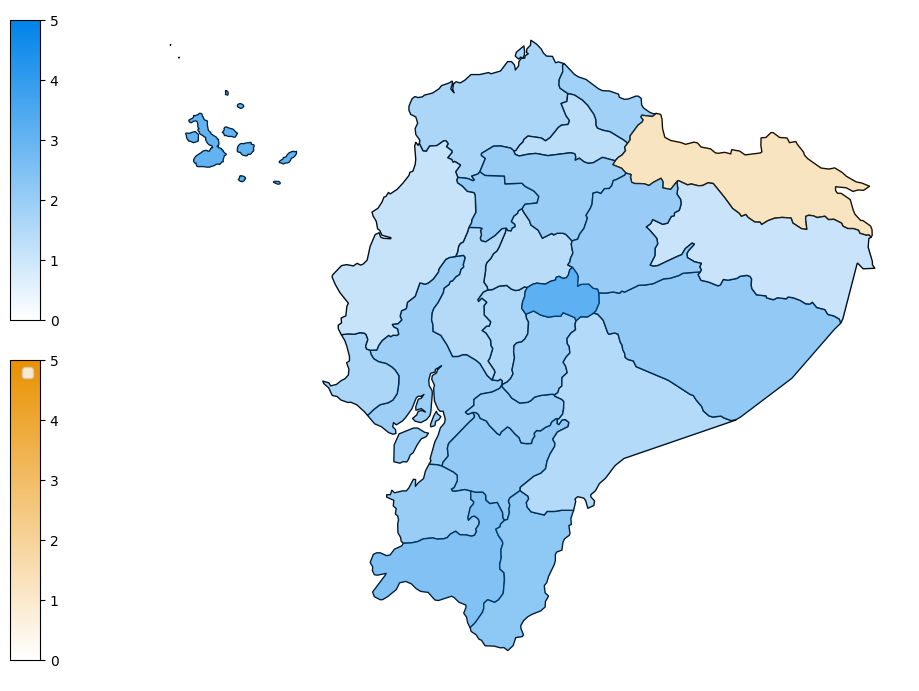

In [251]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib.ticker as ticker

# Load GeoJSON file
gdf = gpd.read_file("Ecuador.geojson")
gdf['name'] = gdf['name'].str.upper()
gdf['name'] = gdf['name'].str.replace('SANTO DOMINGO DE LOS TSACHILAS', 'STO DGO TSACHILAS')

color_si = '#0083E9'
color_no = '#E99100'

# Plot the shapes with a heatmap-like effect based on the score
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')

for name, score in dic_SI_norm.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color=color_si, alpha=score, linewidth=0, label=name)
    
for name, score in dic_NO_norm.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color=color_no, alpha=score, linewidth=0, label=name)

# Create a colormap with a gradient using the specified color
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_si)])

# Crea un objeto Normalizar para mapear los valores al rango 0-1
norm = Normalize(vmin=0, vmax=5)

valores_a_convertir_si = dic_SI.values()
valores_a_convertir_no = dic_NO.values()

# Obtiene los colores correspondientes a los valores dados
colores_correspondientes_si = [cmap(norm(valor)) for valor in valores_a_convertir_si]



# Convierte los colores de formato RGB a formato hexadecimal
colores_hex_si = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_si]


# Add colorbar
cbar_ax1 = fig.add_axes([0, 0.52, 0.03, 0.3])

cbar = ColorbarBase(ax=cbar_ax1, cmap=cmap, norm=norm)
#cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

# Create a colormap with a gradient using the specified color
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_no)])
colores_correspondientes_no = [cmap(norm(valor)) for valor in valores_a_convertir_no]
colores_hex_no = [plt.cm.colors.to_hex(color) for color in colores_correspondientes_no]
# Add colorbar
cbar_ax2 = fig.add_axes([0, 0.18, 0.03, 0.3])

cbar = ColorbarBase(ax=cbar_ax2, cmap=cmap, norm=norm)
#cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))  # Set the labels to percentages from 1 to 100%

plt.legend()
ax.axis('off')
# Save the plot as a PNG image
plt.savefig('mapas/heatmap_plot.png', dpi=300, transparent=True)  # Adjust dpi as needed

data_SI = {
    'NOM_PROVINCIA' : dic_SI.keys(),
    'PROP' : dic_SI.values()
}
data_SI = pd.DataFrame(data_SI)
data_SI['Color Hex'] = colores_hex_si
data_SI['RESPUESTA'] = 'SI'

data_NO = {
    'NOM_PROVINCIA' : dic_NO.keys(),
    'PROP' : dic_NO.values()
}
data_NO = pd.DataFrame(data_NO)
data_NO['Color Hex'] = colores_hex_no
data_NO['RESPUESTA'] = 'NO'

data_1 = pd.concat([data_SI,data_NO])
data_1

In [203]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Define el color hexadecimal
color_hex = '#96c3c4'

# Crea un mapa de color con un gradiente usando el color especificado
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_hex)])

# Define el rango de valores para el colorbar
values = [0, 1, 2, 3, 4, 5]

# Crea un objeto Normalizar para mapear los valores al rango 0-1
norm = Normalize(vmin=min(values), vmax=max(values))

# Lista de valores para los que quieres obtener el color correspondiente
valores_a_convertir = [1, 3, 4]

# Obtiene los colores correspondientes a los valores dados
colores_correspondientes = [cmap(norm(valor)) for valor in valores_a_convertir]

# Convierte los colores de formato RGB a formato hexadecimal
colores_hex = [plt.cm.colors.to_hex(color) for color in colores_correspondientes]

# O puedes imprimir los colores en formato RGB directamente
colores_rgb = [plt.cm.colors.to_rgba(color, alpha=False) for color in colores_correspondientes]

print("Valores:", valores_a_convertir)
print("Colores correspondientes en formato Hex:", colores_hex)
print("Colores correspondientes en formato RGB:", colores_rgb)


Valores: [1, 3, 4]
Colores correspondientes en formato Hex: ['#eaf3f3', '#c0dbdc', '#abcfd0']
Colores correspondientes en formato RGB: [(0.9176470588235294, 0.9529411764705882, 0.9537254901960784, False), (0.7529411764705882, 0.8588235294117647, 0.8611764705882353, False), (0.6705882352941177, 0.8117647058823529, 0.8149019607843138, False)]


In [231]:
data_1

,NOM_PROVINCIA,PROP,Color Hex,RESPUESTA
0,AZUAY,0.680769,#51aaf0,SI
1,BOLIVAR,0.613360,#62b3f1,SI
2,CARCHI,0.648024,#5aaff1,SI
3,CAÑAR,0.658776,#57adf1,SI
4,CHIMBORAZO,0.656564,#57adf1,SI
5,COTOPAXI,0.577559,#6cb8f2,SI
6,EL ORO,0.665270,#55acf0,SI
7,ESMERALDAS,0.622848,#60b2f1,SI
8,GALAPAGOS,0.752050,#3fa2ee,SI
9,GUAYAS,0.660749,#56adf0,SI


In [4]:
from fpdf import FPDF
import pandas as pd

pdf = FPDF()
pdf.add_page()

df = pd.DataFrame({
    'Column A':['Yes','Yes','No'],
    'Column B':['Yes','Yes','No']
})

pdf.set_fill_color(255, 255, 255) #make a white-bg
pdf.set_font("Arial", "B", 12) # <-- ajudst here if needed
for col in df.columns:
    pdf.cell(30, 10, col, 1, 0, "C", 1)
pdf.ln(10) #a newline

for _, row in df.iterrows():
    pdf.set_font("Arial", "", 10)  # <-- ajudst here if needed
    pdf.cell(30, 10, row["Column A"], 1, 0, "C")

    if row["Column B"] == "No":
        pdf.set_fill_color(193, 229, 252) #make a blue-bg
        pdf.cell(30, 10, row["Column B"], 1, 0, "C", 1)
    else:
        pdf.cell(30, 10, row["Column B"], 1, 0, "C")

    pdf.ln(10) #a newline

pdf.output("output.pdf", "F")

/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_55531/1928546396.py:13: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "B", 12) # <-- ajudst here if needed
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_55531/1928546396.py:15: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=0 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  pdf.cell(30, 10, col, 1, 0, "C", 1)
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_55531/1928546396.py:19: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "", 10)  # <-- ajudst here if needed
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_55531/1928546396.py:20: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=0 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  pdf.cell(3

In [187]:
import pandas as pd

PREGUNTAS = pd.read_excel('../resultados_azure/CATALOGO/PREGUNTAS.xls')
CANTON = pd.read_excel('../resultados_azure/CATALOGO/CANTON.xls')
CIRCUNSCRIPCION = pd.read_excel('../resultados_azure/CATALOGO/CIRCUNSCRIPCION.xls')
DIGNIDAD = pd.read_excel('../resultados_azure/CATALOGO/DIGNIDAD.xls')
JUNTA = pd.read_excel('../resultados_azure/CATALOGO/JUNTA.xls')
PARROQUIA = pd.read_excel('../resultados_azure/CATALOGO/PARROQUIA.xls')
OPCIONES = pd.read_excel('../resultados_azure/CATALOGO/OPCIONES.xls')
PROVINCIA = pd.read_excel('../resultados_azure/CATALOGO/PROVINCIA.xls')
ZONA = pd.read_excel('../resultados_azure/CATALOGO/ZONA.xls')

bases_azure = [
    "../resultados_azure/A_REFERENDUM_PREGUNTA_2024.04.25_01.50.01.txt",
    "../resultados_azure/B_REFERENDUM_PREGUNTA1_2024.04.25_01.50.02.txt",
    "../resultados_azure/C_REFERENDUM_PREGUNTA2_2024.04.25_01.50.03.txt",
    "../resultados_azure/D_REFERENDUM_PREGUNTA3_2024.04.25_01.50.04.txt",
    "../resultados_azure/E_REFERENDUM_PREGUNTA4_2024.04.25_01.50.05.txt",
    "../resultados_azure/F_CONSULTAPOPULAR_PREGUNTA1_2024.04.25_01.55.06.txt",
    "../resultados_azure/G_CONSULTAPOPULAR_PREGUNTA2_2024.04.25_01.55.08.txt",
    "../resultados_azure/H_CONSULTAPOPULAR_PREGUNTA3_2024.04.25_01.55.09.txt",
    "../resultados_azure/I_CONSULTAPOPULAR_PREGUNTA4_2024.04.25_01.55.09.txt"
]

final = pd.DataFrame()
for i in bases_azure:
    lectura =  pd.read_table(i,sep='|',names= 
                             ['COD_DIGNIDAD','COD_PROVINCIA',
                              'COD_CIRCUNSCRIPCION','COD_CANTON','COD_PARROQUIA',
                              'COD_ZONA','NUM_JUNTA','SEX_JUNTA','COD_JUNTA',
                              'COD_PREGUNTA','COD_OPCION','NUM_SUF_ACTA','BLANCOS','NULOS','FIN_RESULTADO'])
    final = pd.concat([final,lectura])


baseP = final

baseP = pd.merge(DIGNIDAD,baseP,on='COD_DIGNIDAD')
baseP = pd.merge(PROVINCIA,baseP,on='COD_PROVINCIA')
baseP = pd.merge(CANTON[['COD_CANTON','NOM_CANTON']],baseP,on='COD_CANTON')
baseP = pd.merge(PARROQUIA[['COD_PARROQUIA','NOM_PARROQUIA']],baseP,on='COD_PARROQUIA')
#baseP = pd.merge(Est_parroquia,baseP,on='COD_PARROQUIA')
baseP = pd.merge(PREGUNTAS[['COD_PREGUNTA','NOM_PREGUNTA','LIS_PREGUNTA']],baseP,on='COD_PREGUNTA')
baseP = pd.merge(OPCIONES[['COD_OPCION','NOM_OPCION']],baseP,on='COD_OPCION')
resultadosP = baseP.groupby(by = ['NOM_PREGUNTA','NOM_PROVINCIA','NOM_OPCION']).sum(numeric_only=True)[['FIN_RESULTADO']].reset_index()

preguntas = resultadosP['NOM_PREGUNTA'].unique()
provincias = resultadosP['NOM_PROVINCIA'].unique()



resultados_porcentajes = pd.DataFrame()
for pregunta in preguntas:
    for provincia in provincias:
        aux = resultadosP[resultadosP['NOM_PREGUNTA']==pregunta]
        aux = aux[aux['NOM_PROVINCIA']==provincia]
        total = aux['FIN_RESULTADO'].sum()
        aux['PORCENTAJE'] = aux['FIN_RESULTADO']/total
        aux['%'] = aux['PORCENTAJE'].apply(lambda x: f"{x:.2%}")
        
def proporcion(NO,SI):
    if NO>=SI:
        return NO/SI, 'NO'
    return SI/NO, 'SI'
baseP.groupby(by = ['NOM_PREGUNTA','NOM_PROVINCIA','NOM_OPCION']).sum(numeric_only=True)[['FIN_RESULTADO']].reset_index()
resultado_prop = pd.pivot_table(baseP,'FIN_RESULTADO',aggfunc='sum',index=['NOM_PREGUNTA','NOM_PROVINCIA'],columns='NOM_OPCION').reset_index()
resultado_prop['prop'] = resultado_prop.apply(lambda row: proporcion(row['NO'],row['SI']),axis=1)
resultado_prop = pd.concat([resultado_prop,resultado_prop['prop'].apply(lambda x: pd.Series(str(x).strip("()'").split(", '")))],axis=1)
resultado_prop['Normalizacion'] = resultado_prop[0].astype(float)/5
resultado_prop['TOTAL'] = resultado_prop['NO'] + resultado_prop['SI']
resultado_prop['NO_prop'] = resultado_prop['NO']/resultado_prop['TOTAL']
resultado_prop['SI_prop'] = resultado_prop['SI']/resultado_prop['TOTAL']
resultado_prop['NO %'] = resultado_prop['NO_prop'].apply(lambda x: f"{x:.2%}")
resultado_prop['SI %'] = resultado_prop['SI_prop'].apply(lambda x: f"{x:.2%}")
dic_SI = resultado_prop[(resultado_prop['NOM_PREGUNTA']=='D - REFERÉNDUM - PREGUNTA 3') & (resultado_prop[1]=='SI')][['NOM_PROVINCIA','Normalizacion']]
dic_SI = dic_SI.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
dic_NO = resultado_prop[(resultado_prop['NOM_PREGUNTA']=='D - REFERÉNDUM - PREGUNTA 3') & (resultado_prop[1]=='NO')][['NOM_PROVINCIA','Normalizacion']]
dic_NO = dic_NO.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
resultado_prop







WARNING *** file size (2252492) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,NOM_PREGUNTA,NOM_PROVINCIA,NO,SI,prop,0,1,Normalizacion,TOTAL,NO_prop,SI_prop,NO %,SI %
0,A - REFERÉNDUM - PREGUNTA,AMERICA LATINA EL CARIBE Y AFRICA,1439,5245,"(3.6448922863099376, SI)",3.6448922863099376,SI,0.728978,6684,0.215290,0.784710,21.53%,78.47%
1,A - REFERÉNDUM - PREGUNTA,AZUAY,99174,340819,"(3.436576118740799, SI)",3.436576118740799,SI,0.687315,439993,0.225399,0.774601,22.54%,77.46%
2,A - REFERÉNDUM - PREGUNTA,BOLIVAR,38756,88871,"(2.2930901021777275, SI)",2.2930901021777275,SI,0.458618,127627,0.303666,0.696334,30.37%,69.63%
3,A - REFERÉNDUM - PREGUNTA,CARCHI,30503,84347,"(2.765203422614169, SI)",2.765203422614169,SI,0.553041,114850,0.265590,0.734410,26.56%,73.44%
4,A - REFERÉNDUM - PREGUNTA,CAÑAR,30734,94348,"(3.0698249495672547, SI)",3.0698249495672547,SI,0.613965,125082,0.245711,0.754289,24.57%,75.43%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,I - CONSULTA POPULAR - PREGUNTA 4,SANTA ELENA,79453,128573,"(1.6182271279876153, SI)",1.6182271279876153,SI,0.323645,208026,0.381938,0.618062,38.19%,61.81%
239,I - CONSULTA POPULAR - PREGUNTA 4,STO DGO TSACHILAS,94036,191919,"(2.0409098643072867, SI)",2.0409098643072867,SI,0.408182,285955,0.328849,0.671151,32.88%,67.12%
240,I - CONSULTA POPULAR - PREGUNTA 4,SUCUMBIOS,64576,53629,"(1.2041246340599303, NO)",1.2041246340599303,NO,0.240825,118205,0.546305,0.453695,54.63%,45.37%
241,I - CONSULTA POPULAR - PREGUNTA 4,TUNGURAHUA,82066,261227,"(3.1831330880023394, SI)",3.1831330880023394,SI,0.636627,343293,0.239055,0.760945,23.91%,76.09%


In [184]:
def proporcion(NO,SI):
    if NO>=SI:
        return NO/SI, 'NO'
    return SI/NO, 'SI'
baseP.groupby(by = ['NOM_PREGUNTA','NOM_PROVINCIA','NOM_OPCION']).sum(numeric_only=True)[['FIN_RESULTADO']].reset_index()
resultado_prop = pd.pivot_table(baseP,'FIN_RESULTADO',aggfunc='sum',index=['NOM_PREGUNTA','NOM_PROVINCIA'],columns='NOM_OPCION').reset_index()
resultado_prop['prop'] = resultado_prop.apply(lambda row: proporcion(row['NO'],row['SI']),axis=1)
resultado_prop = pd.concat([resultado_prop,resultado_prop['prop'].apply(lambda x: pd.Series(str(x).strip("()'").split(", '")))],axis=1)
resultado_prop['Normalizacion'] = resultado_prop[0].astype(float)/5
resultado_prop['TOTAL'] = resultado_prop['NO'] + resultado_prop['SI']
resultado_prop['NO %'] = (resultado_prop['NO']/resultado_prop['TOTAL']).apply(lambda x: f"{x:.2%}")
resultado_prop['SI %'] = (resultado_prop['SI']/resultado_prop['TOTAL']).apply(lambda x: f"{x:.2%}")
dic_SI = resultado_prop[(resultado_prop['NOM_PREGUNTA']=='D - REFERÉNDUM - PREGUNTA 3') & (resultado_prop[1]=='SI')][['NOM_PROVINCIA','Normalizacion']]
dic_SI = dic_SI.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
dic_NO = resultado_prop[(resultado_prop['NOM_PREGUNTA']=='D - REFERÉNDUM - PREGUNTA 3') & (resultado_prop[1]=='NO')][['NOM_PROVINCIA','Normalizacion']]
dic_NO = dic_NO.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
resultado_prop




,NOM_PREGUNTA,NOM_PROVINCIA,NO,SI,prop,0,1,Normalizacion,TOTAL,NO %,SI %
0,A - REFERÉNDUM - PREGUNTA,AMERICA LATINA EL CARIBE Y AFRICA,1439,5245,"(3.6448922863099376, SI)",3.6448922863099376,SI,0.728978,6684,21.53%,78.47%
1,A - REFERÉNDUM - PREGUNTA,AZUAY,99174,340819,"(3.436576118740799, SI)",3.436576118740799,SI,0.687315,439993,22.54%,77.46%
2,A - REFERÉNDUM - PREGUNTA,BOLIVAR,38756,88871,"(2.2930901021777275, SI)",2.2930901021777275,SI,0.458618,127627,30.37%,69.63%
3,A - REFERÉNDUM - PREGUNTA,CARCHI,30503,84347,"(2.765203422614169, SI)",2.765203422614169,SI,0.553041,114850,26.56%,73.44%
4,A - REFERÉNDUM - PREGUNTA,CAÑAR,30734,94348,"(3.0698249495672547, SI)",3.0698249495672547,SI,0.613965,125082,24.57%,75.43%
...,...,...,...,...,...,...,...,...,...,...,...
238,I - CONSULTA POPULAR - PREGUNTA 4,SANTA ELENA,79453,128573,"(1.6182271279876153, SI)",1.6182271279876153,SI,0.323645,208026,38.19%,61.81%
239,I - CONSULTA POPULAR - PREGUNTA 4,STO DGO TSACHILAS,94036,191919,"(2.0409098643072867, SI)",2.0409098643072867,SI,0.408182,285955,32.88%,67.12%
240,I - CONSULTA POPULAR - PREGUNTA 4,SUCUMBIOS,64576,53629,"(1.2041246340599303, NO)",1.2041246340599303,NO,0.240825,118205,54.63%,45.37%
241,I - CONSULTA POPULAR - PREGUNTA 4,TUNGURAHUA,82066,261227,"(3.1831330880023394, SI)",3.1831330880023394,SI,0.636627,343293,23.91%,76.09%


In [103]:
resultado_prop['NOM_PREGUNTA'].unique()

array(['A - REFERÉNDUM - PREGUNTA', 'B - REFERÉNDUM - PREGUNTA 1',
       'C - REFERÉNDUM - PREGUNTA 2', 'D - REFERÉNDUM - PREGUNTA 3',
       'E - REFERÉNDUM - PREGUNTA 4', 'F - CONSULTA POPULAR - PREGUNTA 1',
       'G - CONSULTA POPULAR - PREGUNTA 2',
       'H - CONSULTA POPULAR - PREGUNTA 3',
       'I - CONSULTA POPULAR - PREGUNTA 4'], dtype=object)

In [182]:
list(PROVINCIA['NOM_PROVINCIA'][-3:])

['EUROPA ASIA Y OCEANIA', 'EE.UU CANADA', 'AMERICA LATINA EL CARIBE Y AFRICA']

In [107]:
dic_SI = resultado_prop[(resultado_prop['NOM_PREGUNTA']=='D - REFERÉNDUM - PREGUNTA 3') & (resultado_prop[1]=='SI')][['NOM_PROVINCIA','Normalizacion']]
dic_SI = dic_SI.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
dic_NO = resultado_prop[(resultado_prop['NOM_PREGUNTA']=='D - REFERÉNDUM - PREGUNTA 3') & (resultado_prop[1]=='NO')][['NOM_PROVINCIA','Normalizacion']]
dic_NO = dic_NO.set_index('NOM_PROVINCIA').to_dict()['Normalizacion']
#

/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_48132/1913104152.py:39: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  shape.plot(ax=ax, color='red', alpha=score, linewidth=0, label=name)
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_48132/1913104152.py:39: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  shape.plot(ax=ax, color='red', alpha=score, linewidth=0, label=name)
/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_48132/1913104152.py:39: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  shape.plot(ax=ax, color='red', alpha=score, linewidth=0, label=name)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


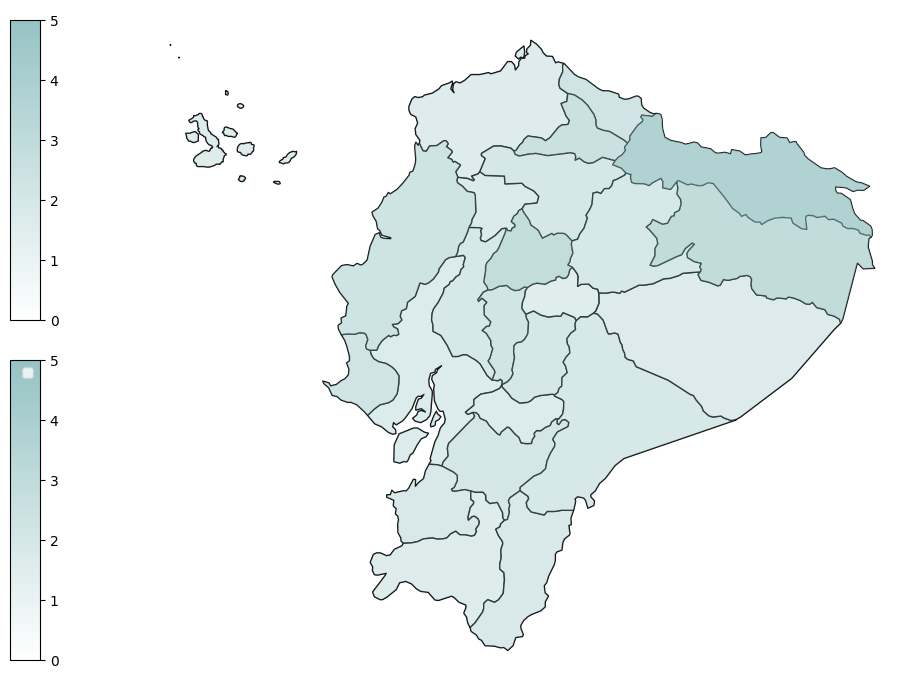

In [178]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize,ListedColormap,LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase


# Load GeoJSON file
gdf = gpd.read_file("Ecuador.geojson")
gdf['name']=gdf['name'].str.upper()
gdf['name'] = gdf['name'].str.replace('SANTO DOMINGO DE LOS TSACHILAS','STO DGO TSACHILAS')

# Prepare your score data
score_data = {
    "Guayas": 0.8,
    "Esmeraldas": 0.6,
    "Carchi": 0.7,
    "Imbabura": 0.9,
    "Sucumbios": 1
}

score_data_no = {
    "Pichincha": 0.8,
    "El Oro": 0.6,
    "Los Rios": 0.7,
    "Loja": 0.9,
    "Galapagos  ": 0.5
}

color_si = '#0083E9'
color_no =  '#E99100'
# Plot the shapes with a heatmap-like effect based on the score
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')

for name, score in dic_NO.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color='#96c3c4', alpha=score, linewidth=0, label=name)
    
for name, score in dic_SI.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color='red', alpha=score, linewidth=0, label=name)

# Define the color
color_hex = '#96c3c4'

# Create a colormap with a gradient using the specified color
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_hex)])

# Define the range of values for the color bar
values = [0, 1, 2, 3, 4, 5]

# Add colorbar
norm = Normalize(vmin=min(values), vmax=max(values))
cbar = ColorbarBase(ax=fig.add_axes([0, 0.52, 0.03, 0.3]), cmap=cmap, norm=norm)


# Define the color
color_hex = '#96c3c4'

# Create a colormap with a gradient using the specified color
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_hex)])

# Define the range of values for the color bar
values = [0, 1, 2, 3, 4, 5]

# Add colorbar
norm = Normalize(vmin=min(values), vmax=max(values))
cbar = ColorbarBase(ax=fig.add_axes([0, 0.18, 0.03, 0.3]), cmap=cmap, norm=norm)


#plt.xlabel('Maximo')
#plt.ylabel('Minimo')
plt.legend()
ax.axis('off')
# Save the plot as a PNG image
plt.savefig('mapas/heatmap_plot.png', dpi=300,transparent = True)  # Adjust dpi as needed
plt.show()




In [156]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Define el color hexadecimal
color_hex = '#96c3c4'

# Crea un mapa de color con un gradiente usando el color especificado
cmap = LinearSegmentedColormap.from_list('custom_cmap', [(0, '#ffffff'), (1, color_hex)])

# Define el rango de valores para el colorbar
values = [0, 1, 2, 3, 4, 5]

# Crea un objeto Normalizar para mapear los valores al rango 0-1
norm = Normalize(vmin=min(values), vmax=max(values))

# Lista de valores para los que quieres obtener el color correspondiente
valores_a_convertir = [1, 3, 4]

# Obtiene los colores correspondientes a los valores dados
colores_correspondientes = [cmap(norm(valor)) for valor in valores_a_convertir]

# Convierte los colores de formato RGB a formato hexadecimal
colores_hex = [plt.cm.colors.to_hex(color) for color in colores_correspondientes]

# O puedes imprimir los colores en formato RGB directamente
colores_rgb = [plt.cm.colors.to_rgba(color, alpha=False) for color in colores_correspondientes]

print("Valores:", valores_a_convertir)
print("Colores correspondientes en formato Hex:", colores_hex)
print("Colores correspondientes en formato RGB:", colores_rgb)


Valores: [1, 3, 4]
Colores correspondientes en formato Hex: ['#eaf3f3', '#c0dbdc', '#abcfd0']
Colores correspondientes en formato RGB: [(0.9176470588235294, 0.9529411764705882, 0.9537254901960784, False), (0.7529411764705882, 0.8588235294117647, 0.8611764705882353, False), (0.6705882352941177, 0.8117647058823529, 0.8149019607843138, False)]


/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_46389/2639955594.py:30: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

/var/folders/0q/l5j608j10jq82grhg4m4pf0h0000gn/T/ipykernel_46389/2639955594.py:36: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


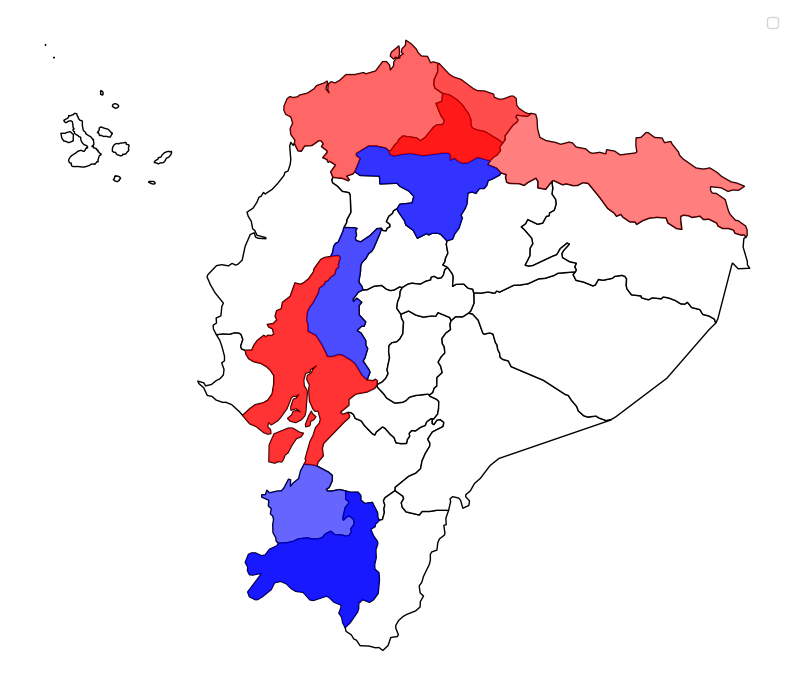

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON file
gdf = gpd.read_file("Ecuador.geojson")

# Prepare your score data
score_data = {
    "Guayas": 0.8,
    "Esmeraldas": 0.6,
    "Carchi": 0.7,
    "Imbabura": 0.9,
    "Sucumbios": 0.5
}

score_data_no = {
    "Pichincha": 0.8,
    "El Oro": 0.6,
    "Los Rios": 0.7,
    "Loja": 0.9,
    "Galapagos  ": 0.5
}

# Plot the shapes with a heatmap-like effect based on the score
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')

for name, score in score_data_no.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color='blue', alpha=score, linewidth=0, label=name)
    
for name, score in score_data.items():
    shape = gdf[gdf['name'] == name]
    shape.plot(ax=ax, color='red', alpha=score, linewidth=0, label=name)

plt.legend()

# Remove the outer box around the plot
ax.axis('off')

# Save the plot as a PNG image
plt.savefig('heatmap_plot.png', dpi=300)  # Adjust dpi as needed
plt.show()
